In [1]:
import numpy as np
from tensorflow import keras
import utils

In [2]:
(x_train, y_train), (x_val, y_val), (x_test, y_test) = utils.load_time_series_data()

x_train = np.expand_dims(x_train, -1)
x_val = np.expand_dims(x_val, -1)
x_test = np.expand_dims(x_test, -1)

print(f"x_train.shape = {x_train.shape}, y_train.shape = {y_train.shape}")
print(f"x_val.shape = {x_val.shape}, y_val.shape = {y_val.shape}")
print(f"x_test.shape = {x_test.shape}, y_test.shape = {y_test.shape}")

x_train.shape = (7000, 50, 1), y_train.shape = (7000,)
x_val.shape = (2000, 50, 1), y_val.shape = (2000,)
x_test.shape = (1000, 50, 1), y_test.shape = (1000,)


In [3]:
utils.reset_session()

model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.SimpleRNN(1)
])

optimizer = keras.optimizers.Adam(lr=1e-2)
model.compile(loss='mse', optimizer=optimizer, metrics=['mae'])
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val), verbose=0)

In [4]:
history_steps = 50
forecast_steps = 10
series = utils.generate_time_series(1, history_steps + forecast_steps, seed=43)
series = np.expand_dims(series, -1)
print(f"series.shape = {series.shape}")

series.shape = (1, 60, 1)


In [5]:
x_history, y_forecast = series[:, :history_steps], series[:, history_steps:]

history = x_history
y_pred = []
for step in range(forecast_steps):
    y_pred_single = model.predict(history[:, step:])
    y_pred_single = np.expand_dims(y_pred_single, -1)
    y_pred.append(y_pred_single)
    history = np.concatenate([history, y_pred_single], axis=1)
    
y_pred = np.concatenate(y_pred, axis=1)

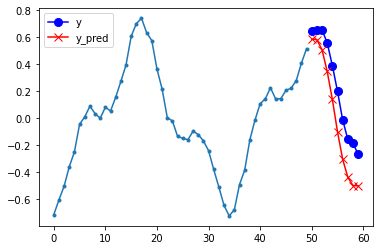

In [6]:
utils.plot_series_multiple_forecasts(x_history, y_forecast, y_pred)